# Cuaterniones y Rotaciones 3D
## Primera entrega AB Unit 34

Alumno: Javier Ruiz

Fecha: 26/02/25

# 1. Fundamentos Teóricos 

## ¿Qué es un cuaternión?

Un cuaternión es una extensión de los números complejos y se expresa como: 

    q = w + xi + yj + zk

donde w es la parte real y (x, y, z) constituyen la parte imaginaria. Los cuaterniones tienen propiedades algebraicas muy útiles para representar rotaciones en 3D. En particular:

- Multiplicación no conmutativa: El producto de cuaterniones no es conmutativo, lo que refleja la naturaleza de las rotaciones en el espacio.

- Conjugado e Inverso: Para un cuaternión q, el conjugado es q* = w − xi − yj − zk. Si q es unitario (|q| = 1), entonces q⁻¹ = q*. Esto es fundamental, ya que para rotar un vector v en 3D se usa la fórmula:
         
     v' = q · (0, v) · q⁻¹

     donde (0, v) es el cuaternión puro que representa al vector.
    
 **Representación de una Rotación:**
    Para rotar un vector v alrededor de un eje unitario u = (u_x, u_y, u_z) por un ángulo θ, el cuaternión de rotación se define como:

     q = [cos(θ/2), sin(θ/2)·u_x, sin(θ/2)·u_y, sin(θ/2)·u_z]

La ventaja de usar cuaterniones es que evitan problemas comunes de otros métodos, como el gimbal lock, y permiten una interpolación suave (SLERP) entre rotaciones.



## Ángulos de Euler para la Descripción de Rotaciones en 3D

Los ángulos de Euler describen la orientación de un objeto en el espacio tridimensional mediante tres rotaciones sucesivas. Utilizando la convención intrínseca **ZYX**, se realizan las siguientes rotaciones:

1. Rotación en torno al eje Z (Yaw)

    Se gira el objeto en el plano XY según el ángulo $\psi$. La matriz de rotación es:

    $$
    R_z(\psi) =
    \begin{pmatrix}
    \cos\psi & -\sin\psi & 0 \\
    \sin\psi & \cos\psi  & 0 \\
    0        & 0         & 1
    \end{pmatrix}
    $$

2. Rotación en torno al eje Y (Pitch)

    Luego se rota el objeto respecto al eje Y mediante el ángulo $\theta$, inclinando el objeto hacia arriba o hacia abajo. La matriz de rotación es:
    
    $$
    R_y(\theta) =
    \begin{pmatrix}
    \cos\theta & 0 & \sin\theta \\
    0          & 1 & 0 \\
    -\sin\theta& 0 & \cos\theta
    \end{pmatrix}
    $$

3. Rotación en torno al eje X (Roll)

    Finalmente, se rota el objeto en torno al eje X mediante el ángulo $\phi$, lo que produce una inclinación lateral. La matriz de rotación es:

    $$
    R_x(\phi) =
    \begin{pmatrix}
    1 & 0         & 0 \\
    0 & \cos\phi & -\sin\phi \\
    0 & \sin\phi & \cos\phi
    \end{pmatrix}
    $$

Matriz de Rotación Total

La orientación final se obtiene al multiplicar las matrices en el siguiente orden:

$$
R = R_z(\psi) \cdot R_y(\theta) \cdot R_x(\phi)
$$




## 2. Ejemplo en Python

**Uso de Cuaterniones para Rotaciones 3D:**

Aspectos técnicos incluidos:
- Definición y propiedades de los cuaterniones.
- Cómo construir un cuaternión de rotación a partir de un ángulo y un eje.
- Aplicación de la fórmula de rotación: v' = q · (0, v) · q⁻¹.
- Comparación de cuaterniones vs. métodos basados en ángulos de Euler y matrices de rotación.

2.1. Operaciones básicas con cuaterniones

- Multiplicacion de  dos cuaterniones q1 y q2.
        
    Cada cuaternión se representa como un vector numpy [w, x, y, z].
    La multiplicación se define de forma no conmutativa.
        
    Args:
        
        q1 (np.ndarray): Primer cuaternión.  
        q2 (np.ndarray): Segundo cuaternión.
        
    Returns:
        
        np.ndarray: El producto q1*q2.

- Calcula el conjugado de un cuaternión.
    
    Para q = [w, x, y, z], el conjugado es [w, -x, -y, -z].
    
    Args:
        
        q (np.ndarray): Cuaternión.
    
    Returns:
        
        np.ndarray: Conjugado de q.

- Normaliza un cuaternión para que tenga norma 1.
    
    Args:
        
        q (np.ndarray): Cuaternión.
    
    Returns:
        
        np.ndarray: Cuaternión normalizado


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# Multiplicación de cuaterniones
def quaternion_multiply(q1, q2):
   
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    # Fórmula de multiplicación de cuaterniones:
    w = w1*w2 - x1*x2 - y1*y2 - z1*z2
    x = w1*x2 + x1*w2 + y1*z2 - z1*y2
    y = w1*y2 - x1*z2 + y1*w2 + z1*x2
    z = w1*z2 + x1*y2 - y1*x2 + z1*w2
    return np.array([w, x, y, z])

# Conjugado de un cuaternión
def quaternion_conjugate(q):

    w, x, y, z = q
    return np.array([w, -x, -y, -z])

# Normalización de un cuaternión
def quaternion_normalization(q):

    return q / np.linalg.norm(q) 

q1 = np.array([1, 2, 3, 4], dtype=float)
q2 = np.array([5, 6, 7, 8], dtype=float)
prod = quaternion_multiply(q1, q2)
print("Ejemplo multiplicación:\nq1 =", q1, "\nq2 =", q2, "\nq1 * q2 =", prod)
print("Celda 1 ejecutada: Importaciones y funciones de cuaternmiones definidas") 

Ejemplo multiplicación:
q1 = [1. 2. 3. 4.] 
q2 = [5. 6. 7. 8.] 
q1 * q2 = [-60.  12.  30.  24.]
Celda 1 ejecutada: Importaciones y funciones de cuaternmiones definidas


2.2 Rotación de vectores y generación de vertices

- Rota un vector 3D v usando el cuaternión de rotación q.
    
    Args:
        
        v (np.ndarray): Vector 3D, de forma (3,).
    
        q (np.ndarray): Cuaternión de rotación unitario, de forma (4,).
    
    Returns:
       
        np.ndarray: Vector rotado.


- Genera los 8 vértices de un cubo centrado en el origen.
    
    Args:
        
        side_length (float): Longitud de la arista del cubo.
    
    Returns:
        
        np.ndarray: Arreglo de forma (8, 3) con las coordenadas de los vértices.

- Aplica una rotación definida por el cuaternión q a cada punto 3D.
    
    Args:
        
        points (np.ndarray): Conjunto de puntos de forma (N, 3).
    
        q (np.ndarray): Cuaternión de rotación unitario.
    
    Returns:
        
        np.ndarray: Puntos rotados.


In [15]:
def rotate_vector(v, q):
 
    # Convertir el vector a un cuaternión puro: 0 + v_x i + v_y j + v_z k
    q_v = np.concatenate(([0], v))
    # Para un cuaternión unitario, el inverso es su conjugado
    q_conj = quaternion_conjugate(q)
    # Aplicar la fórmula de rotación: v' = q * q_v * q_conj
    qv_rot = quaternion_multiply(quaternion_multiply(q, q_v), q_conj)
    # Los componentes imaginarios son el vector rotado
    return qv_rot[1:]

def generate_cube_vertices(side_length=2):
   
    a = side_length / 2.0
    vertices = np.array([
        [-a, -a, -a],
        [-a, -a,  a],
        [-a,  a, -a],
        [-a,  a,  a],
        [ a, -a, -a],
        [ a, -a,  a],
        [ a,  a, -a],
        [ a,  a,  a]
    ])
    return vertices

def rotate_points(points, q):
   
    rotados = [rotate_vector(p, q) for p in points]
    return np.array(rotados)

# Ejemplo: rotar un vector
v_example = np.array([1, 0, 0])
# Usamos un cuaternión que representa una rotación de 90° alrededor de z (por simplicidad)
theta_example = np.pi / 2
q_example = np.array([np.cos(theta_example/2), 0, 0, np.sin(theta_example/2)])
q_example = quaternion_normalization(q_example)
v_rot = rotate_vector(v_example, q_example)
print("Vector original:", v_example)
print("Vector rotado (90° sobre z):", v_rot)

# Generar vértices del cubo
cube_vertices = generate_cube_vertices(side_length=2.0)
print("Vértices del cubo:\n", cube_vertices)
print("Celda 2 ejecutada: Funciones de rotación y generación de vértices definidas.\n")

Vector original: [1 0 0]
Vector rotado (90° sobre z): [0. 1. 0.]
Vértices del cubo:
 [[-1. -1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]
 [-1.  1.  1.]
 [ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
Celda 2 ejecutada: Funciones de rotación y generación de vértices definidas.



2.3 Graficar el cubo 3D

- Dibuja un cubo en un Axes3D dado sus vértices.
    
    ax: objeto Axes3D
    
    vertices: arreglo (8,3) con las coordenadas de los vértices
    
    color: color para aristas y vértices
    
    label: etiqueta para la leyenda


In [16]:
def plot_cube(ax, vertices, color='b', label='Cubo'):
   
    # Definir aristas
    edges = [
        (0,1), (0,2), (0,4),
        (1,3), (1,5),
        (2,3), (2,6),
        (3,7),
        (4,5), (4,6),
        (5,7),
        (6,7)
    ]
    # Graficar aristas
    for i, j in edges:
        ax.plot([vertices[i,0], vertices[j,0]],
                [vertices[i,1], vertices[j,1]],
                [vertices[i,2], vertices[j,2]],
                color=color, linewidth=2)
    # Graficar vértices
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2],
               color=color, s=50, label=label)

print("Celda 3 ejecutada: función para crear el cubo definida.\n")


Celda 3 ejecutada: función para crear el cubo definida.



2.4 Ejemplo de uso

Ejecutando visualización 3D
Cuaternión de rotación (unitario): [0.92387953 0.27059805 0.27059805 0.        ]
Vértices del cubo original:
 [[-1. -1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]
 [-1.  1.  1.]
 [ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
Vértices del cubo rotado:
 [[-1.5        -0.5        -0.70710678]
 [-0.5        -1.5         0.70710678]
 [-1.20710678  1.20710678  0.29289322]
 [-0.20710678  0.20710678  1.70710678]
 [ 0.20710678 -0.20710678 -1.70710678]
 [ 1.20710678 -1.20710678 -0.29289322]
 [ 0.5         1.5        -0.70710678]
 [ 1.5         0.5         0.70710678]]


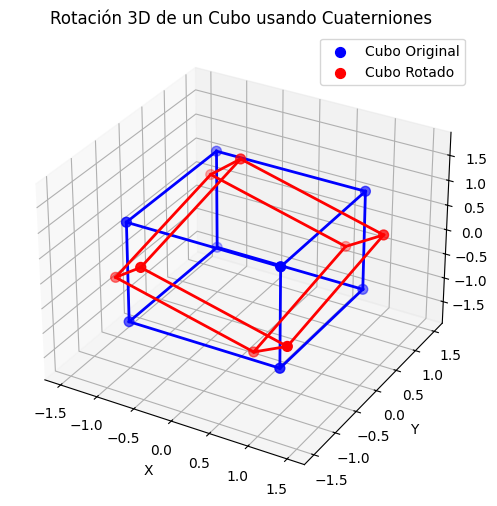

In [ ]:

def main():
    # 1. Definir un cuaternión de rotación
    # Queremos rotar 45° (pi/4) alrededor del eje (1,1,0)
    theta = np.pi / 4
    axis = np.array([1, 1, 0], dtype=float)
    axis /= np.linalg.norm(axis)  # normalizar
    # Cuaternión de rotación: [cos(theta/2), sin(theta/2)*u_x, sin(theta/2)*u_y, sin(theta/2)*u_z]
    q = np.array([np.cos(theta/2),
                  axis[0]*np.sin(theta/2),
                  axis[1]*np.sin(theta/2),
                  axis[2]*np.sin(theta/2)], dtype=float)
    q = quaternion_normalization(q)
    
    print("Cuaternión de rotación (unitario):", q)
    
    # 2. Generar el cubo
    cube = generate_cube_vertices(side_length=2.0)
    print("Vértices del cubo original:\n", cube)

    # 3. Rotar el cubo
    cube_rot = rotate_points(cube, q)
    print("Vértices del cubo rotado:\n", cube_rot)
    
    # 4. Visualizar en 3D
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    plot_cube(ax, cube, color='b', label='Cubo Original')
    plot_cube(ax, cube_rot, color='r', label='Cubo Rotado')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Rotación 3D de un Cubo usando Cuaterniones')
    ax.legend()
    plt.show()

print("Ejecutando visualización 3D")
main()


2.5. Visualización del movimiento

- Interpola linealmente entre dos cuaterniones (normalizando en cada paso).
    
    NOTA: Esto no es SLERP; es una aproximación lineal que puede dar trayectorias lineales.
    
    Args:
        
        q_start (np.ndarray): Cuaternión inicial.
    
        q_end (np.ndarray): Cuaternión final.
    
        num_steps (int): Número de pasos.
    
    Returns:
        
        list: Lista de cuaterniones interpolados.

Puntos de la trayectoria del vértice [1,1,1]:
[[1.         1.         1.        ]
 [1.06053451 0.93946549 0.99632883]
 [1.12142655 0.87857345 0.98514526]
 [1.18197791 0.81802209 0.96631676]
 [1.24147108 0.75852892 0.9398848 ]
 [1.29919656 0.70080344 0.90607   ]
 [1.35448057 0.64551943 0.86526704]
 [1.40671109 0.59328891 0.81802945]
 [1.45536005 0.54463995 0.76504539]
 [1.5        0.5        0.70710678]]


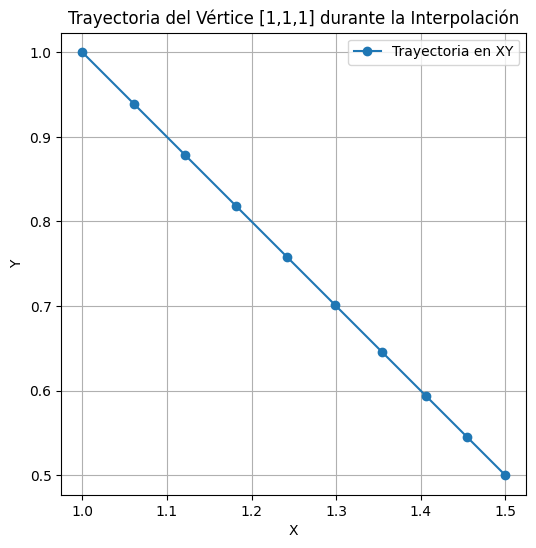

In [18]:

def interpolate_quaternions(q_start, q_end, num_steps):

    quats = []
    for t in np.linspace(0, 1, num_steps):
        q_interp = (1 - t) * q_start + t * q_end
        q_interp = quaternion_normalization(q_interp)
        quats.append(q_interp)
    return quats

# Definimos el cuaternión identidad (sin rotación)
q_identity = np.array([1, 0, 0, 0], dtype=float)
# Usamos el cuaternión q definido en main_visualization para la rotación de 45° alrededor del eje (1,1,0)
theta = np.pi / 4
axis = np.array([1, 1, 0], dtype=float)
axis /= np.linalg.norm(axis)
q_final = np.array([np.cos(theta/2),
                    axis[0]*np.sin(theta/2),
                    axis[1]*np.sin(theta/2),
                    axis[2]*np.sin(theta/2)], dtype=float)
q_final = quaternion_normalization(q_final)

# Interpolamos entre q_identity y q_final
num_steps = 10
quaternions_interp = interpolate_quaternions(q_identity, q_final, num_steps)

# Seleccionamos un vértice para seguir su trayectoria; por ejemplo, el vértice [1,1,1]

v_original = np.array([1, 1, 1], dtype=float)
trajectory = [rotate_vector(v_original, q_int) for q_int in quaternions_interp]
trajectory = np.array(trajectory)

print("Puntos de la trayectoria del vértice [1,1,1]:")
print(trajectory)

# Graficamos la trayectoria en el plano XY 
plt.figure(figsize=(6,6))
plt.plot(trajectory[:,0], trajectory[:,1], 'o-', label='Trayectoria en XY')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trayectoria del Vértice [1,1,1] durante la Interpolación')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


La gráfica ilustra cómo cambia la posición de un vector 3D (en este caso, [1,1,1]
[1,1,1]) en el plano XY cuando se aplica una interpolación lineal (en lugar de una interpolación esférica) entre dos cuaterniones: el cuaternión identidad (sin rotación) y un cuaternión que representa una rotación concreta (45° alrededor de un eje dado).

En otras palabras, se va variando un parámetro 𝑡 de 0 a 1, y en cada paso se “mezcla” el cuaternión identidad con el cuaternión de rotación. Cada cuaternión intermedio se aplica al vector original, y en la gráfica se representan las coordenadas (𝑥,𝑦) del vector resultante.

- Lo relevante: se observa que el trazado es una línea recta en el plano XY, lo que no representa un giro “natural” (como un arco), sino una trayectoria lineal debido a la interpolación lineal en el espacio de cuaterniones (no se está usando SLERP, que sí genera trayectorias esféricas más fieles a la rotación real).

- En conclusión: la gráfica demuestra que, si interpolamos “ingenuamente” entre cuaterniones, la evolución del vector no describe un arco de rotación suave, sino un camino recto en las proyecciones XY (y, por extensión, en 3D), evidenciando la diferencia entre la interpolación lineal y la interpolación esférica (SLERP).